In [ ]:
# In this notebook, we study the dataset train_FD001.txt, from the Turbofan dataset
# source: https://data.nasa.gov/Aerospace/Turbofan-engine-degradation-simulation-data-set/vrks-gjie
# The main idea is to predict the RUL, that is to say, in how many time a machine will 
# break down

In [1]:
import sys
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
source  = {}
source["train"] = ["./CMAPSSData/train_FD00{}.txt".format(i) for i in range(1, 5)]
source["test"] = ["./CMAPSSData/test_FD00{}.txt".format(i) for i in range(1, 5)]
source["rul"] = ["./CMAPSSData/RUL_FD00{}.txt".format(i) for i in range(1, 5)]

In [3]:
for k in source:
    print(k)
    for f in source[k]:
        print('{0: <4} {1}'.format('', f))

train
     ./CMAPSSData/train_FD001.txt
     ./CMAPSSData/train_FD002.txt
     ./CMAPSSData/train_FD003.txt
     ./CMAPSSData/train_FD004.txt
test
     ./CMAPSSData/test_FD001.txt
     ./CMAPSSData/test_FD002.txt
     ./CMAPSSData/test_FD003.txt
     ./CMAPSSData/test_FD004.txt
rul
     ./CMAPSSData/RUL_FD001.txt
     ./CMAPSSData/RUL_FD002.txt
     ./CMAPSSData/RUL_FD003.txt
     ./CMAPSSData/RUL_FD004.txt


In [4]:
columns_name = ['unit', 'cycle'] +\
    ["setting_{}".format(i) for i in range(3)] +\
    ["sensor_{}".format(i) for i in range(21)]

In [7]:
df_train_0 = pd.read_csv(source["train"][0],
                         sep='\s+',
                         header=None,
                         names=columns_name)

In [10]:
list_of_units = np.unique(df_train_0["unit"].values)
number_of_units = list_of_units.shape[0]

print("size of dataframe : {0}".format(df_train_0.shape))
print(df_train_0.head(5))

size of dataframe : (20631, 26)
   unit  cycle  setting_0  setting_1  setting_2  sensor_0  sensor_1  sensor_2  \
0     1      1    -0.0007    -0.0004      100.0    518.67    641.82   1589.70   
1     1      2     0.0019    -0.0003      100.0    518.67    642.15   1591.82   
2     1      3    -0.0043     0.0003      100.0    518.67    642.35   1587.99   
3     1      4     0.0007     0.0000      100.0    518.67    642.35   1582.79   
4     1      5    -0.0019    -0.0002      100.0    518.67    642.37   1582.85   

   sensor_3  sensor_4  ...  sensor_11  sensor_12  sensor_13  sensor_14  \
0   1400.60     14.62  ...     521.66    2388.02    8138.62     8.4195   
1   1403.14     14.62  ...     522.28    2388.07    8131.49     8.4318   
2   1404.20     14.62  ...     522.42    2388.03    8133.23     8.4178   
3   1401.87     14.62  ...     522.86    2388.08    8133.83     8.3682   
4   1406.22     14.62  ...     522.19    2388.04    8133.80     8.4294   

   sensor_15  sensor_16  sensor_17  

In [11]:
print("observing settings....")
settings_description = df_train_0[columns_name[2:5]].describe().transpose()
print(settings_description)

observing settings....
             count        mean       std       min       25%    50%       75%  \
setting_0  20631.0   -0.000009  0.002187   -0.0087   -0.0015    0.0    0.0015   
setting_1  20631.0    0.000002  0.000293   -0.0006   -0.0002    0.0    0.0003   
setting_2  20631.0  100.000000  0.000000  100.0000  100.0000  100.0  100.0000   

                max  
setting_0    0.0087  
setting_1    0.0006  
setting_2  100.0000  


In [8]:
print("settings with no variation : ")
list_settings_with_no_variation = list(settings_description[settings_description["std"] < 0.00001].index)
id_settings_with_no_variation = [int(x.split('_')[1]) for x in list_settings_with_no_variation]
print(list_settings_with_no_variation)
print("idx: ", id_settings_with_no_variation)

settings with no variation : 
['setting_2']
idx:  [2]


In [9]:
print("observing sensors...")
sensor_description = df_train_0[columns_name[5:]].describe().transpose()
print(sensor_description)

observing sensors...
             count         mean           std        min        25%  \
sensor_0   20631.0   518.670000  0.000000e+00   518.6700   518.6700   
sensor_1   20631.0   642.680934  5.000533e-01   641.2100   642.3250   
sensor_2   20631.0  1590.523119  6.131150e+00  1571.0400  1586.2600   
sensor_3   20631.0  1408.933782  9.000605e+00  1382.2500  1402.3600   
sensor_4   20631.0    14.620000  1.776400e-15    14.6200    14.6200   
sensor_5   20631.0    21.609803  1.388985e-03    21.6000    21.6100   
sensor_6   20631.0   553.367711  8.850923e-01   549.8500   552.8100   
sensor_7   20631.0  2388.096652  7.098548e-02  2387.9000  2388.0500   
sensor_8   20631.0  9065.242941  2.208288e+01  9021.7300  9053.1000   
sensor_9   20631.0     1.300000  0.000000e+00     1.3000     1.3000   
sensor_10  20631.0    47.541168  2.670874e-01    46.8500    47.3500   
sensor_11  20631.0   521.413470  7.375534e-01   518.6900   520.9600   
sensor_12  20631.0  2388.096152  7.191892e-02  2387.8800

In [12]:
print("sensor with no variation....")

list_sensors_no_variation = list(sensor_description[sensor_description["std"] < 0.00001].index )
id_sensors_no_variation = [int(x.split('_')[1]) for x in list_sensors_no_variation]
print(list_sensors_no_variation)
print("ids: ", id_sensors_no_variation)

sensor with no variation....
['sensor_0', 'sensor_4', 'sensor_9', 'sensor_15', 'sensor_17', 'sensor_18']
ids:  [0, 4, 9, 15, 17, 18]


In [13]:
# calculating rul...
dic_rul = {}
for u in list_of_units:
    dic_rul[u] = np.max(df_train_0[df_train_0["unit"] == u]["cycle"].values)

list_rul = list(dic_rul.values())
print("")
print("Data : ")
print("{0:<20} : {1}".format("numbers of units", number_of_units))
print("{0:<20} : {1}".format("numbers of rul", len(list_rul)))
print("{0:<20} : min {1}, mean {2}, max {3}".format("stats", np.min(list_rul), np.mean(list_rul), np.max(list_rul)))


Data : 
numbers of units     : 100
numbers of rul       : 100
stats                : min 128, mean 206.31, max 362


In [14]:
# check if there's some NaN values in the data
print(df_train_0.isna().any())
# there's any NaN

unit         False
cycle        False
setting_0    False
setting_1    False
setting_2    False
sensor_0     False
sensor_1     False
sensor_2     False
sensor_3     False
sensor_4     False
sensor_5     False
sensor_6     False
sensor_7     False
sensor_8     False
sensor_9     False
sensor_10    False
sensor_11    False
sensor_12    False
sensor_13    False
sensor_14    False
sensor_15    False
sensor_16    False
sensor_17    False
sensor_18    False
sensor_19    False
sensor_20    False
dtype: bool


In [15]:
# reduce the number of columns to significant values....
significant_columns = columns_name.copy()
for col in list_settings_with_no_variation + list_sensors_no_variation:
    significant_columns.remove(col)

print("significant columns {0}".format(significant_columns))
df_train_0_reduce = df_train_0[significant_columns].copy()

significant columns ['unit', 'cycle', 'setting_0', 'setting_1', 'sensor_1', 'sensor_2', 'sensor_3', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_16', 'sensor_19', 'sensor_20']


In [17]:
# adding RUL column
# count down to zero
# assumption, the line are ordered

ruls_values = []
for u in list_of_units:
    ruls_values += [dic_rul[u] - df_train_0[df_train_0["unit"] == u]["cycle"].values]
ruls_values = np.concatenate(ruls_values, axis=0)

df_train_0_reduce["RUL"] = ruls_values

cycles = df_train_0_reduce["cycle"].values

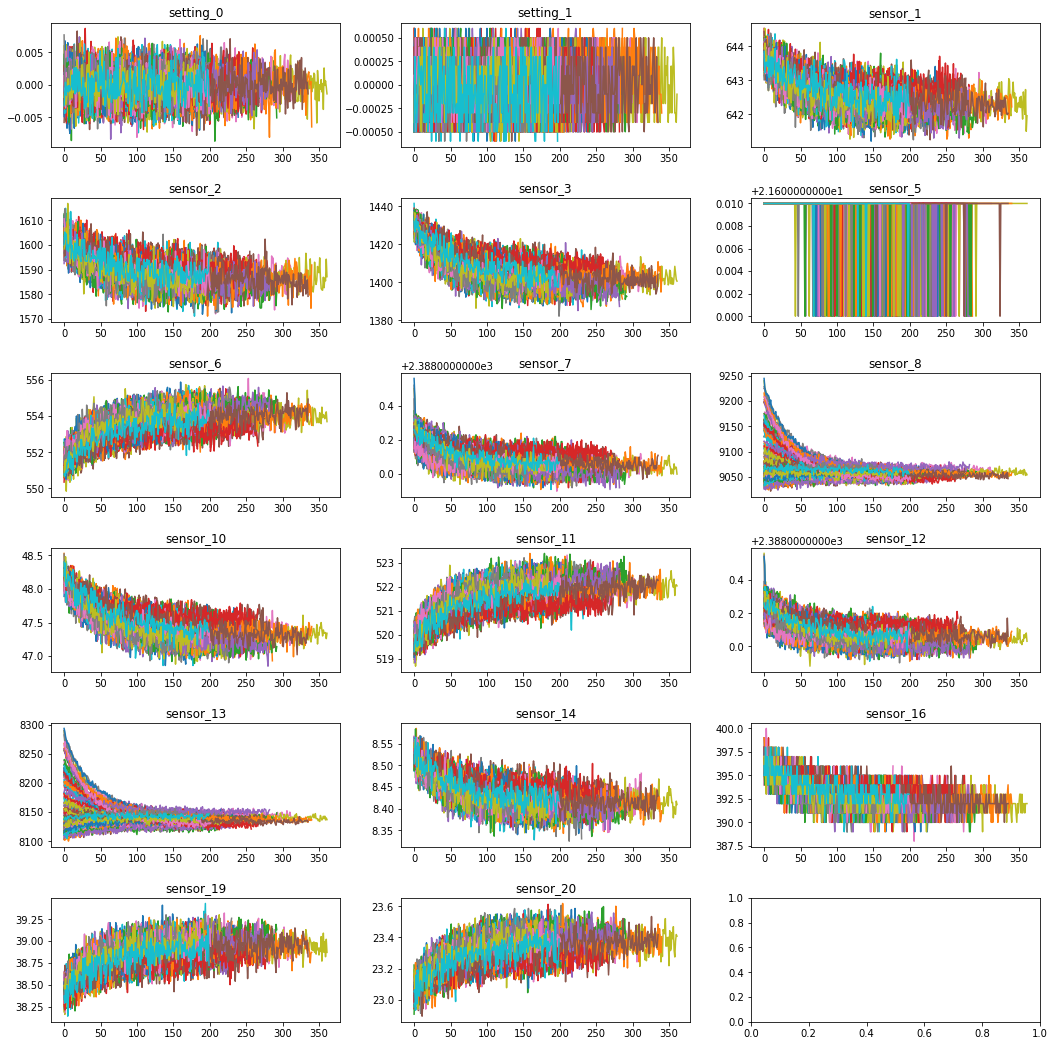

In [22]:
# plotting curves sensor_x = f(RUL) 
# Note: the end is in the left of the plot, 0 in x-axis
plt.rcParams['figure.figsize'] = [15, 15]
int_plot_col = 3
int_plot_row = math.ceil(len(significant_columns[2:]) / int_plot_col)
fig, axs = plt.subplots(int_plot_row, int_plot_col)
fig.tight_layout(pad=3.0)
it = 0
for cible in significant_columns[2:]:
    for u in list_of_units:
        x = df_train_0_reduce[df_train_0_reduce["unit"] == u]["RUL"].values
        y = df_train_0_reduce[df_train_0_reduce["unit"] == u][cible].values
        axs[it//int_plot_col, it%int_plot_col].plot(x, y, label=u)
        axs[it//int_plot_col, it%int_plot_col].set_title(cible)
    it += 1
#plt.legend()
plt.show()

In [23]:
# source : https://stackoverflow.com/questions/10058227/calculating-mean-of-arrays-with-different-lengths
def tolerant_mean(arrs):
    lens = [len(i) for i in arrs]
    arr = np.ma.empty((np.max(lens),len(arrs)))
    arr.mask = True
    for idx, l in enumerate(arrs):
        arr[:len(l),idx] = l
    return arr.mean(axis = -1), arr.std(axis=-1)

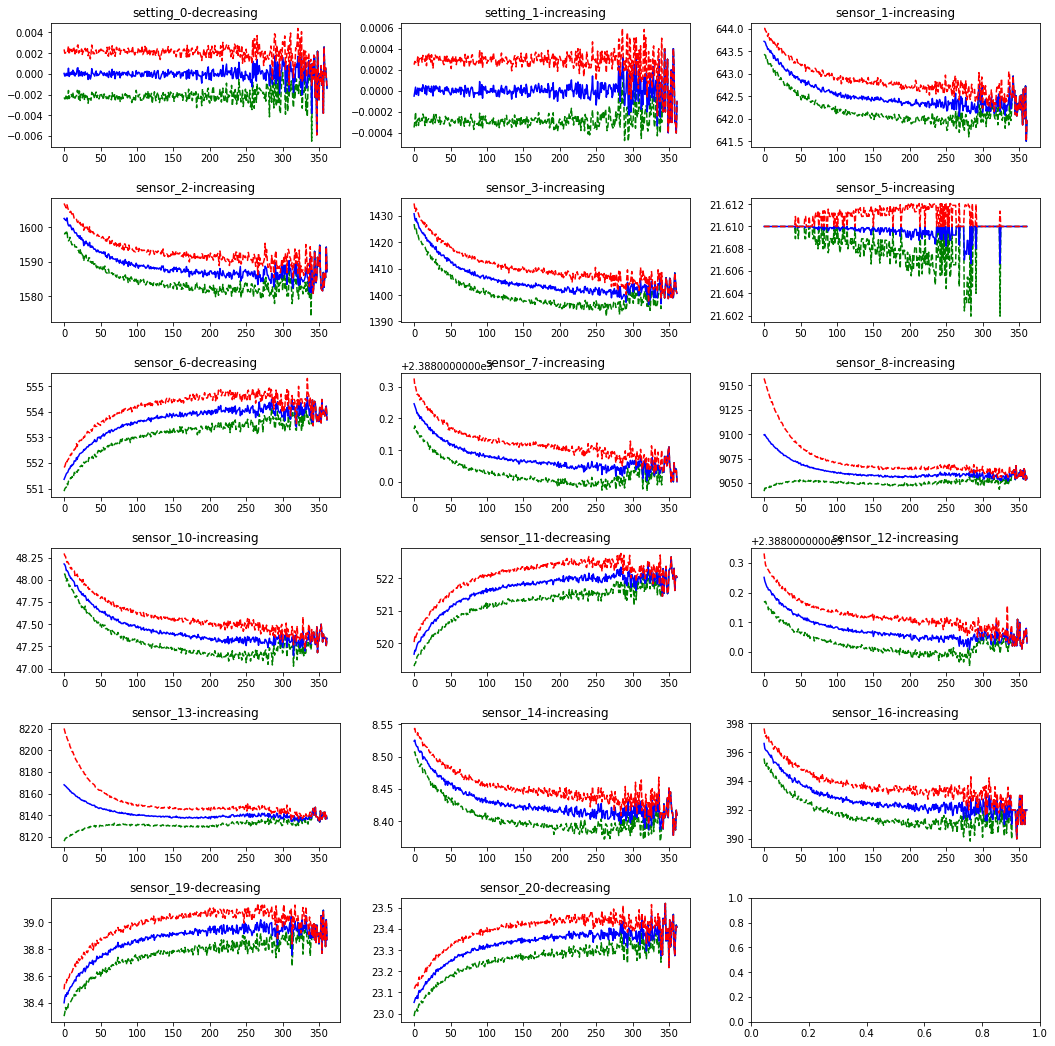

In [25]:
# cleaning the graphs
nb_max_rul = max(ruls_values)
fig, axs = plt.subplots(int_plot_row, int_plot_col)
fig.tight_layout(pad=3.0)
it = 0
mean_orientation = {}
for cible in significant_columns[2:]:
    data = []
    for u in list_of_units:
        y = df_train_0_reduce[df_train_0_reduce["unit"] == u][cible].values
        data += [np.flip(y)]
    mean, std = tolerant_mean(data)
    mean_0 = np.mean(mean[:5])  # mean of the last 5 values (rul 0-4)
    mean_1 = np.mean(mean[-5:])  # mean of the first 5 values
    if mean_0 >= mean_1:
        mean_orientation[cible] = 1
        orientation = "increasing"
    else:
        mean_orientation[cible] = -1
        orientation = "decreasing"
    x = np.arange(mean.shape[0])
    axs[it//int_plot_col, it%int_plot_col].plot(x, mean - std, 'g--', label='std')
    axs[it//int_plot_col, it%int_plot_col].plot(x, mean, 'blue', label='mean')
    axs[it//int_plot_col, it%int_plot_col].plot(x, mean + std, 'r--', label='std')
    axs[it//int_plot_col, it%int_plot_col].set_title(cible + '-' + orientation)
    it += 1
# plt.legend()
plt.show()

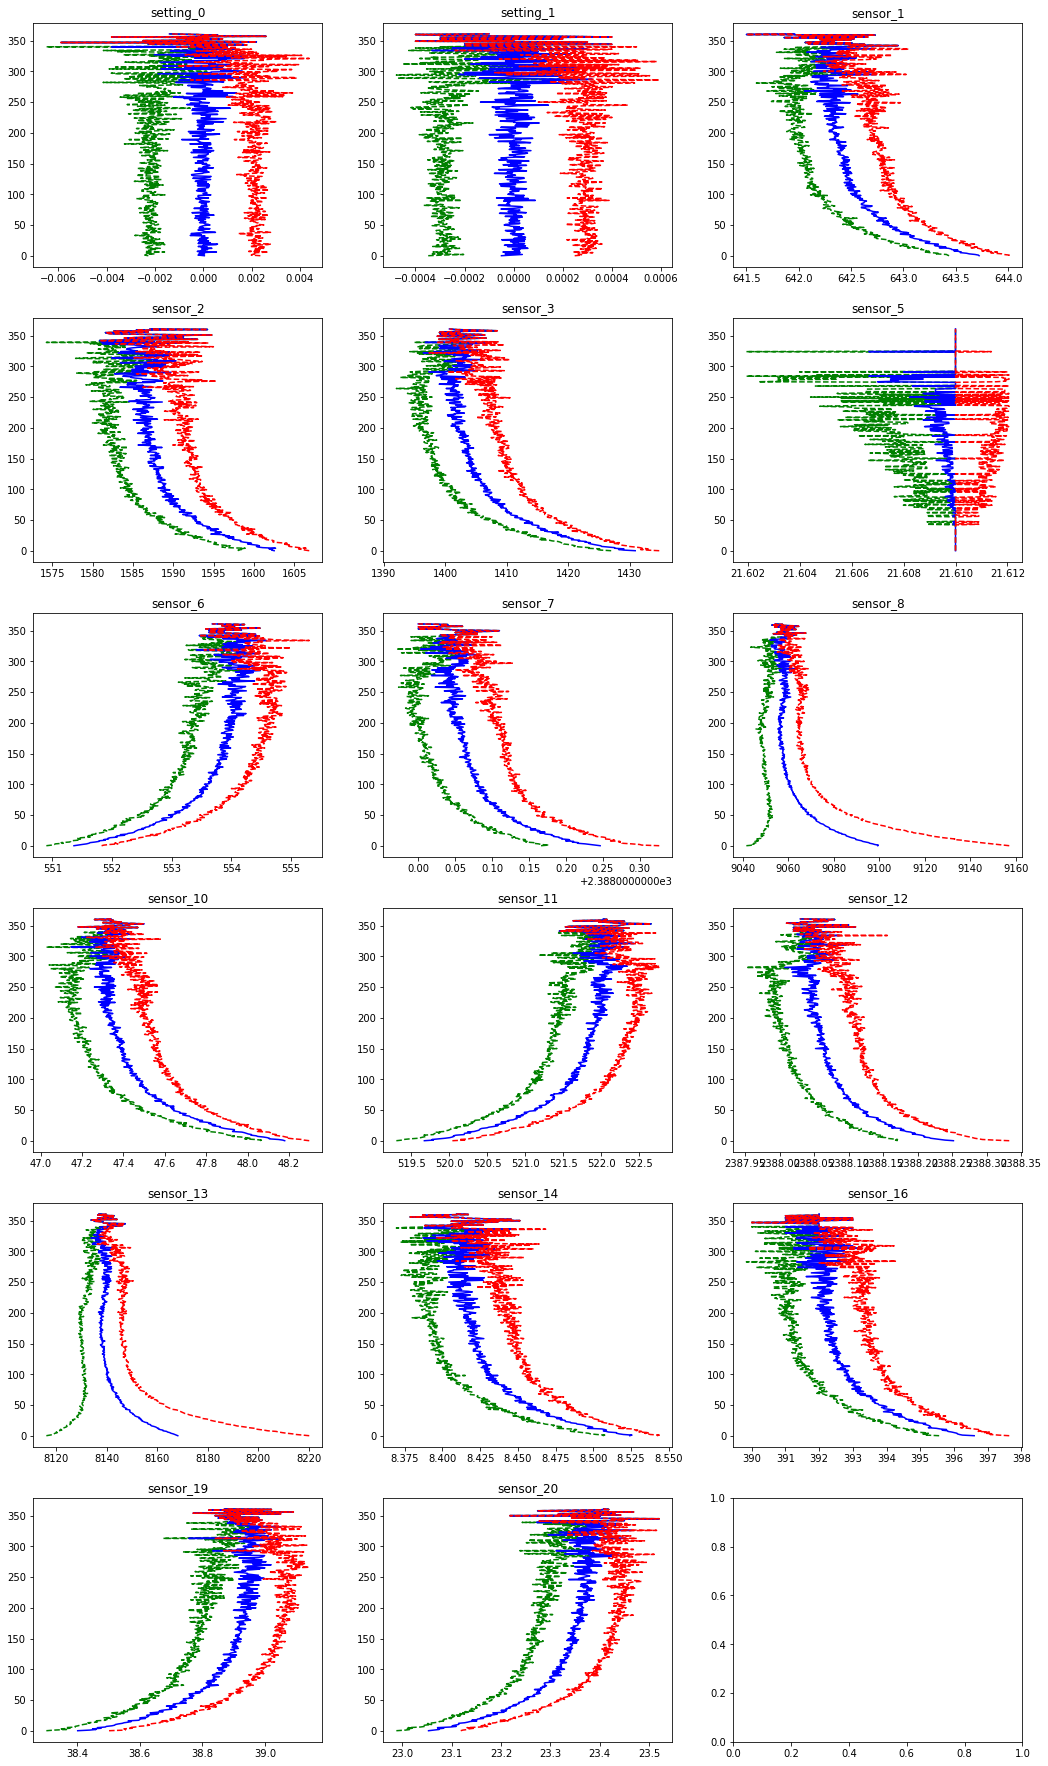

In [29]:
# we plot the curves in the second axis, the pupose is to find settings or sensors with 
# a significant variation when the RUL reaches 0
plt.rcParams['figure.figsize'] = [15, 25]
nb_max_rul = max(ruls_values)
fig, axs = plt.subplots(int_plot_row, int_plot_col)
fig.tight_layout(pad=3.0)
it = 0
for cible in significant_columns[2:]:
    data = []
    for u in list_of_units:
        y = df_train_0_reduce[df_train_0_reduce["unit"] == u][cible].values
        data += [np.flip(y)]
    mean, std = tolerant_mean(data)
    x = np.arange(mean.shape[0])
    axs[it//int_plot_col, it%int_plot_col].plot(mean - std, x,'g--', label='std')
    axs[it//int_plot_col, it%int_plot_col].plot(mean, x,'blue', label='mean')
    axs[it//int_plot_col, it%int_plot_col].plot( mean + std, x, 'r--', label='std')
    axs[it//int_plot_col, it%int_plot_col].set_title(cible)
    it += 1
plt.show()

In [30]:
# sensor 0 and 1 are not significant
significant_columns2 = significant_columns.copy()
for col in ['setting_0', 'setting_1']:
    significant_columns2.remove(col)
    del mean_orientation[col]

# List of significant attributes
print("significant columns 2 {0}".format(significant_columns2))

significant columns 2 ['unit', 'cycle', 'sensor_1', 'sensor_2', 'sensor_3', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_16', 'sensor_19', 'sensor_20']
